# Posição (ou separatrizes)

## Autores

- [Italo Seara](https://github.com/italoseara)
- [Lucas Luige](https://github.com/lluigecm)
- [Gabriel Prado](https://github.com/Gabriel-Prd)

## Objetivo

Apresentar o conceito de separatrizes e suas aplicações.

## Bibliotecas utilizadas

- [Numpy](https://numpy.org/) para cálculos numéricos
- [Matplotlib](https://matplotlib.org/) para visualização de dados
- [Pandas](https://pandas.pydata.org/) para manipulação de dados

In [1]:
# Carregando os pacotes necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Funções utilizadas

As funções criadas na célula abaixo serão utilizadas ao longo do notebook para facilitar a visualização dos dados, transformando os dados que seriam retornados em forma de arrays em dataframes que podem ser visualizados como uma tabela. Note que não é necessário utiliza-las para fins de cálculo, apenas para visualização.

Todas as funções abaixo usam a função `np.quantile` do numpy para calcular os quantis. A documentação da função pode ser encontrada [aqui](https://numpy.org/doc/stable/reference/generated/numpy.quantile.html).

In [2]:
def quartiles(arr: np.array) -> pd.DataFrame:
    return pd.DataFrame(
        np.quantile(arr, [0.25, 0.5, 0.75]), 
        columns=['Quartis'], 
        index=['25%', '50%', '75%']
    ).T

def deciles(arr: np.array) -> pd.DataFrame:
    return pd.DataFrame(
        np.quantile(arr, np.arange(0.1, 1, 0.1)),
        columns=['Decis'], 
        index=[f'{i}%' for i in range(10, 100, 10)]
    ).T

def percentiles(arr: np.array) -> pd.DataFrame:
    return pd.DataFrame(
        np.quantile(arr, np.arange(0.01, 1, 0.01)),
        columns=['Percentis'], 
        index=[f'{i}%' for i in range(1, 100)]
    ).T

# Quartis

## A partir de um array

In [3]:
# Criando um array de 1000 números aleatórios com distribuição normal
k = np.random.normal(size=1000)

# Calculando os quartis
quartiles(k)

,25%,50%,75%
Quartis,-0.627752,-0.004723,0.629919


In [4]:
# Caso queira calcular os quartis separadamente
q1 = np.quantile(k, 0.25)
q2 = np.quantile(k, 0.5)
q3 = np.quantile(k, 0.75)

q1, q2, q3

(-0.6277516629599174, -0.004723469866102614, 0.6299190194928486)

In [5]:
# Amplitude Interquartil
q3 - q1

1.257670682452766

## Visualização com Boxplot

<img src="https://api.www.labxchange.org/api/v1/xblocks/lb:LabXchange:d8863c77:html:1/storage/211626365402575-b88c4d0fdacd5abb4c3dc2de3bc004bb.png" width="600">

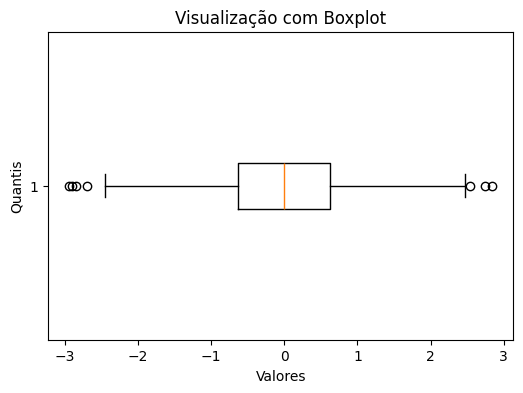

In [6]:
# Definindo o tamanho da figura
plt.figure(figsize=(6, 4))

# Definindo o título e os eixos
plt.title('Visualização com Boxplot')
plt.xlabel('Valores')
plt.ylabel('Quantis')

# Plotando o boxplot
plt.boxplot(k, vert=False)

# Mostrando o gráfico
plt.show()

## Visualização com Histograma

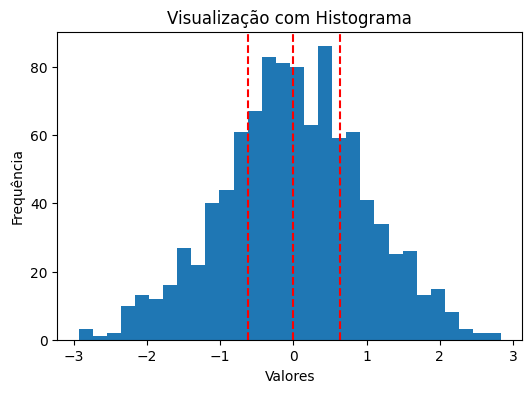

In [7]:
# Definindo o tamanho da figura
plt.figure(figsize=(6, 4))

# Definindo o título e os eixos
plt.title('Visualização com Histograma')
plt.xlabel('Valores')
plt.ylabel('Frequência')

# Desenhando o histograma
plt.hist(k, bins=30)

# Desenhando as linhas dos quartis
plt.axvline(q1, color='red', linestyle='dashed')
plt.axvline(q2, color='red', linestyle='dashed')
plt.axvline(q3, color='red', linestyle='dashed')

# Mostrando o gráfico
plt.show()

## A partir de um conjunto de dados

Documentação da função `pd.DataFrame.quantile` [aqui](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html).

In [175]:
# Carregando o dataset
dt = pd.read_csv('iris.csv')

dt.info()  # Verificando as informações do dataset
dt.head()  # Visualizando as primeiras linhas do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [176]:
# Calculando os quartis
dt.quantile([0.25, 0.5, 0.75], numeric_only=True)
# `numeric_only=True` para calcular apenas as colunas numéricas, caso contrário, 
# ocorrerá um erro por conta da coluna `variety` (string)

,sepal.length,sepal.width,petal.length,petal.width
0.25,5.1,2.8,1.60,0.3
0.50,5.8,3.0,4.35,1.3
0.75,6.4,3.3,5.10,1.8


In [179]:
# Calculando os quartis de uma coluna específica
quartiles(dt['petal.length'])

,25%,50%,75%
Quartis,1.6,4.35,5.1


In [11]:
# - Decis

# A partir de um vetor
k = np.array([1, 3, 5, 6, 6, 9, 10, 13, 15, 20, 22, 24, 25, 29, 31, 31, 39, 40, 55, 90, 91])

# Todos os decis
deciles(k)

,10%,20%,30%,40%,50%,60%,70%,80%,90%
Decis,5.0,6.0,10.0,15.0,22.0,25.0,31.0,39.0,55.0


In [12]:
# Decis específicos
np.quantile(k, 0.3)

10.0

In [13]:
# A partir de um DataFrame
dt = pd.read_csv('iris.csv')

# Todos os decis
deciles(dt['petal.length'])

,10%,20%,30%,40%,50%,60%,70%,80%,90%
Decis,1.4,1.5,1.7,3.9,4.35,4.64,5.0,5.32,5.8


In [14]:
# Decis específicos
np.quantile(dt['petal.length'], 0.3)

1.7

In [15]:
# - Percentis

# A partir de um vetor
k = np.array([31, 31, 37, 40, 48, 50, 51, 51, 60, 62, 64, 65, 65, 65, 66, 74, 74, 88, 91, 92])

# Todos os percentis
percentiles(k)

,1%,2%,3%,4%,5%,6%,7%,8%,9%,10%,...,90%,91%,92%,93%,94%,95%,96%,97%,98%,99%
Percentis,31.0,31.0,31.0,31.0,31.0,31.84,32.98,34.12,35.26,36.4,...,88.3,88.87,89.44,90.01,90.58,91.05,91.24,91.43,91.62,91.81


In [16]:
# Percentis específicos
np.quantile(k, 0.92)

89.44

In [17]:
# A partir de um DataFrame
dt = pd.read_csv('iris.csv')

# Todos os percentis
percentiles(dt['petal.length'])

,1%,2%,3%,4%,5%,6%,7%,8%,9%,10%,...,90%,91%,92%,93%,94%,95%,96%,97%,98%,99%
Percentis,1.149,1.2,1.3,1.3,1.3,1.3,1.343,1.4,1.4,1.4,...,5.8,5.8,5.9,5.957,6.006,6.1,6.108,6.353,6.602,6.7


In [18]:
# Percentis específicos
np.quantile(dt['petal.length'], 0.07)

1.3430000000000002